# **Overview:**

Chương trình này là tiếp nối của chương trình Part-2_Visualization.ipynb

Chương trình là thử nghiệm các mô hình Machine Learning trên tập dữ liệu đã được xử lý cũng như có cái nhìn tổng quan từ 2 phần trước.

# **6. Khai báo và cài đặt cần sử dụng**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

import xgboost as xgb
import lightgbm as lgb
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.inspection import permutation_importance
from sklearn.model_selection import KFold
from datetime import datetime
import warnings

In [2]:
from pylab import rcParams

rcParams['figure.figsize'] = 16,9

### **Đọc dữ liệu**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Code dạo/Phishing_URL/Check_data/5.urldata.csv')

In [5]:
df

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,wvk12-my.sharepoint.com,0,0,1,5,0,0,1,1,0,1,1,1,0,0,1,0,1
9996,adplife.com,0,0,1,4,0,0,0,0,0,1,0,1,0,0,1,0,1
9997,kurortnoye.com.ua,0,1,1,3,0,0,1,0,0,0,1,1,1,0,1,0,1
9998,norcaltc-my.sharepoint.com,0,0,1,5,0,0,1,1,0,1,1,1,0,0,1,0,1


**Kiểm tra độ quan trọng của đăc trưng (feature important)**

In [6]:
df.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')

In [7]:
features = ['Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards']

In [8]:
X = df[features]
y = df['Label']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [11]:
rf.feature_importances_

array([5.51923879e-03, 4.13449137e-02, 4.93929994e-01, 1.67345630e-01,
       1.19430932e-02, 7.17099048e-04, 2.10146953e-02, 1.43589726e-01,
       1.12912418e-02, 2.26332448e-02, 2.13236224e-02, 2.81982864e-02,
       8.55651178e-03, 4.68277531e-05, 2.25458746e-02])

<BarContainer object of 15 artists>

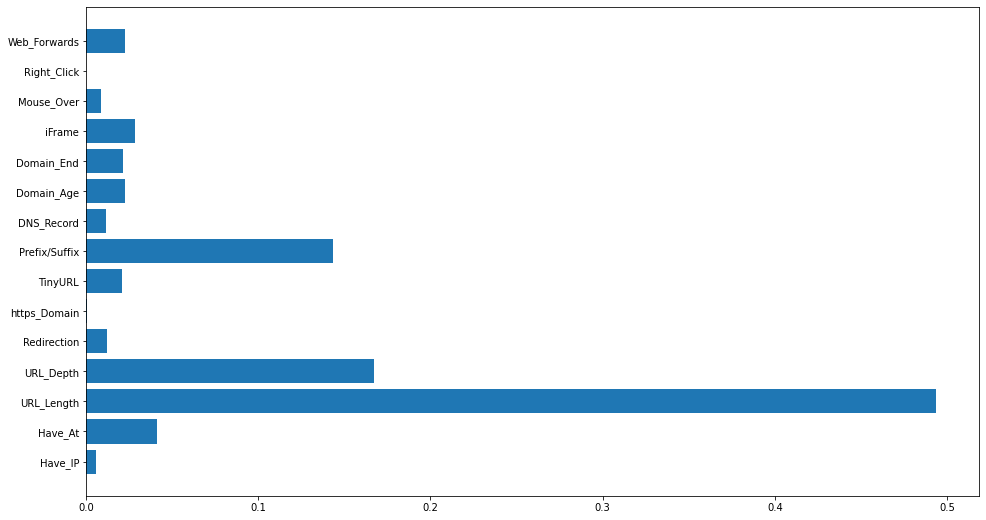

In [12]:
plt.barh(features, rf.feature_importances_)

# **7. Huấn luyện mô hình - Classification**

**Split dataset**

In [13]:
Y = y

In [14]:
from sklearn.model_selection import train_test_split

In [57]:
X_train,X_test,Y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [41]:
print('Kích thước tập huấn luyện: ', X_train.shape, y_train.shape)
print('Kích thước tập kiểm tra: ', X_test.shape, y_test.shape)

Kích thước tập huấn luyện:  (7000, 15) (7000,)
Kích thước tập kiểm tra:  (3000, 15) (3000,)


In [42]:
# Hàm tính độ chính xác, ma trận nhầm lẫn, Recall, precision, f1 score và vẽ đồ thị ROC
from sklearn import metrics
from sklearn.model_selection import cross_val_score
def evaluate_model(model, X_test, y_test, y_prediction):
  print("Các chỉ số đánh giá mức độ hiệu quả của mô hình: ")
  #Accuracy
  print("1. Accuracy:",metrics.accuracy_score(y_prediction,y_test))
  # confusion_matrix
  print('2. confusion_matrix:')
  print(confusion_matrix(y_prediction,y_test))
  # recall_score
  print('3. recall_score: ', recall_score(y_prediction,y_test))
  # precision_score
  print('4. precision_score: ', precision_score(y_prediction,y_test))
  # f1_score
  print('5. f1_score: ', f1_score(y_prediction,y_test))
  # ROC plot
  print('6. Biểu đồ ROC của mô hình:')
  metrics.plot_roc_curve(model, X_test, y_test)
  plt.show()

**Logistic Regression**

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Các chỉ số đánh giá mức độ hiệu quả của mô hình: 
1. Accuracy: 0.7873333333333333
2. confusion_matrix:
[[1424  525]
 [ 113  938]]
3. recall_score:  0.8924833491912464
4. precision_score:  0.6411483253588517
5. f1_score:  0.7462211614956245
6. Biểu đồ ROC của mô hình:


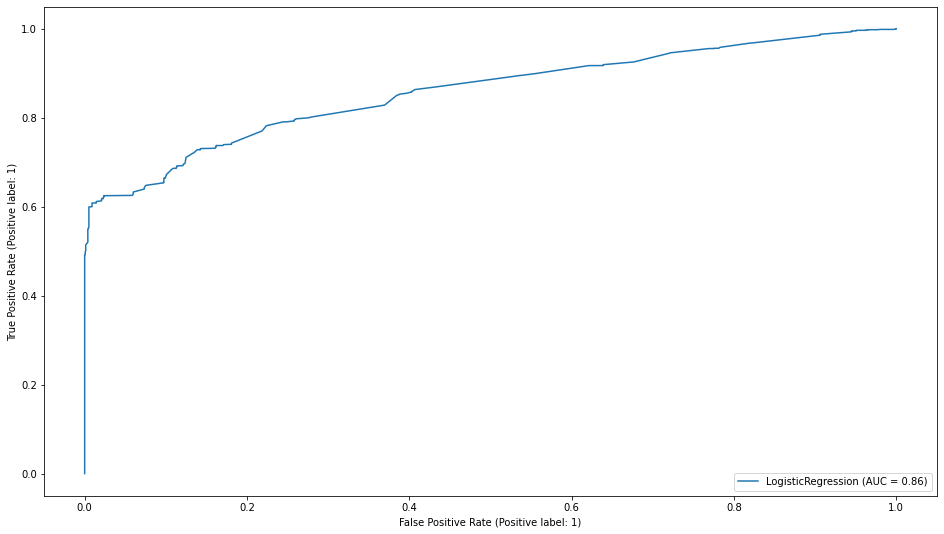

In [44]:
#Given smote, we have to do a little adjustment
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

logreg = LogisticRegression(fit_intercept=True, penalty='l2')
logreg.fit(X_train, Y_train)

logregprediction=logreg.predict(X_test)

evaluate_model (logreg, X_test, y_test, logregprediction)

**Linear Discriminant Analysis**

Các chỉ số đánh giá mức độ hiệu quả của mô hình: 
1. Accuracy: 0.79
2. confusion_matrix:
[[1445  538]
 [  92  925]]
3. recall_score:  0.9095378564405113
4. precision_score:  0.6322624743677375
5. f1_score:  0.745967741935484
6. Biểu đồ ROC của mô hình:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


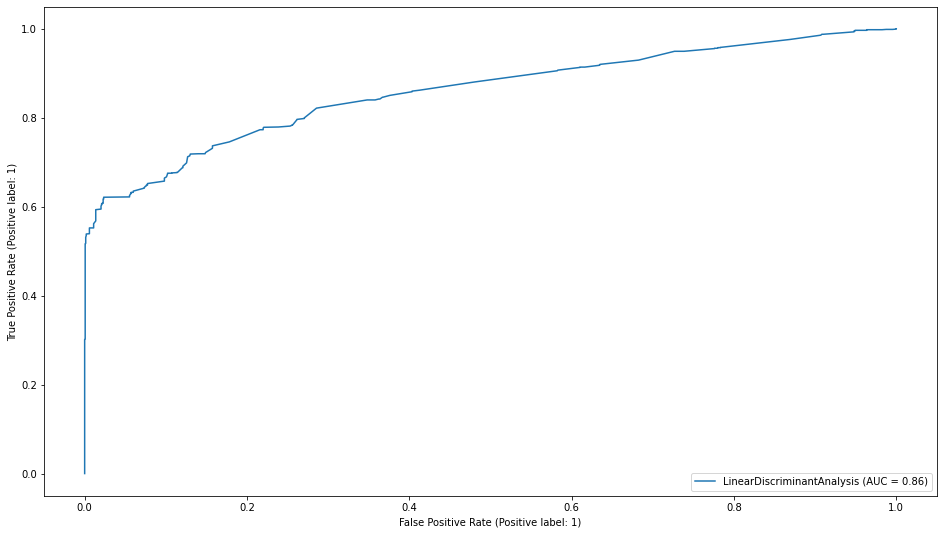

In [45]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)

lda_prediction=lda.predict(X_test)

evaluate_model (lda, X_test, y_test, lda_prediction)

**Gaussian Naive Bayes**

Các chỉ số đánh giá mức độ hiệu quả của mô hình: 
1. Accuracy: 0.7926666666666666
2. confusion_matrix:
[[1522  607]
 [  15  856]]
3. recall_score:  0.9827784156142365
4. precision_score:  0.5850991114149009
5. f1_score:  0.7335047129391603
6. Biểu đồ ROC của mô hình:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


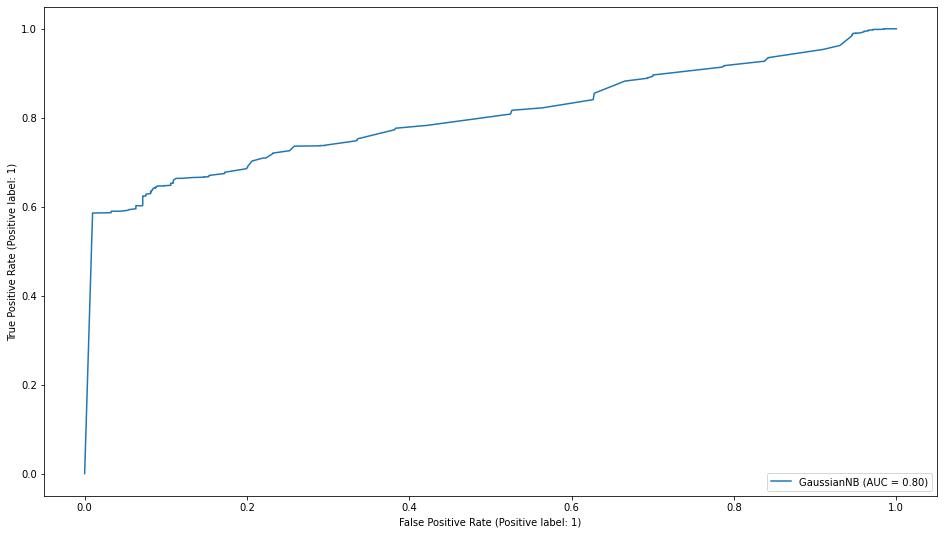

In [46]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

gnbprediction=gnb.predict(X_test)

evaluate_model (gnb, X_test, y_test, gnbprediction)

**Decision Tree Classifier**

Các chỉ số đánh giá mức độ hiệu quả của mô hình: 
1. Accuracy: 0.8523333333333334
2. confusion_matrix:
[[1443  349]
 [  94 1114]]
3. recall_score:  0.9221854304635762
4. precision_score:  0.7614490772385509
5. f1_score:  0.8341445151628604
6. Biểu đồ ROC của mô hình:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


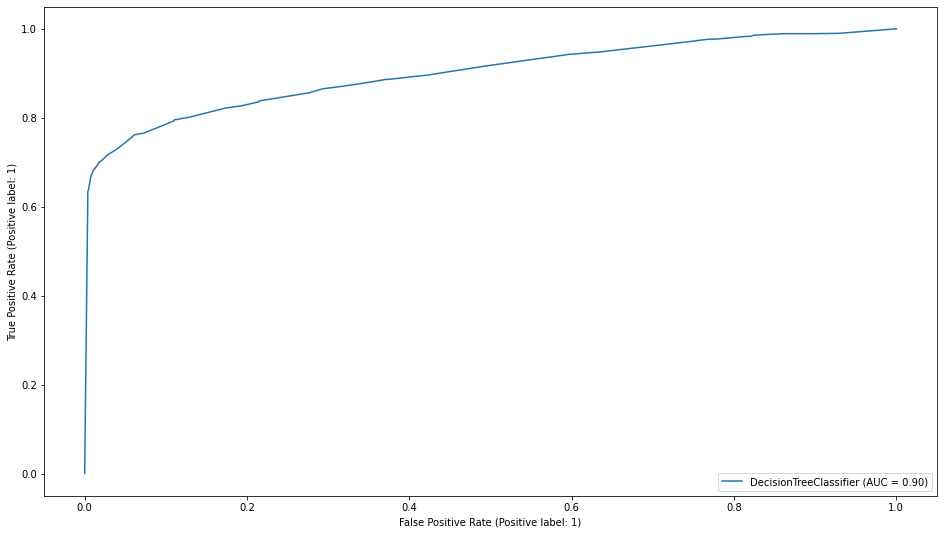

In [47]:
from sklearn.tree import DecisionTreeClassifier

dtc= DecisionTreeClassifier(random_state=42)
dtc.fit(X_train,Y_train)

dtcprediction=dtc.predict(X_test)

evaluate_model (dtc, X_test, y_test, dtcprediction)

**Random Forest Classifier**

Các chỉ số đánh giá mức độ hiệu quả của mô hình: 
1. Accuracy: 0.854
2. confusion_matrix:
[[1441  342]
 [  96 1121]]
3. recall_score:  0.9211175020542317
4. precision_score:  0.7662337662337663
5. f1_score:  0.8365671641791044
6. Biểu đồ ROC của mô hình:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


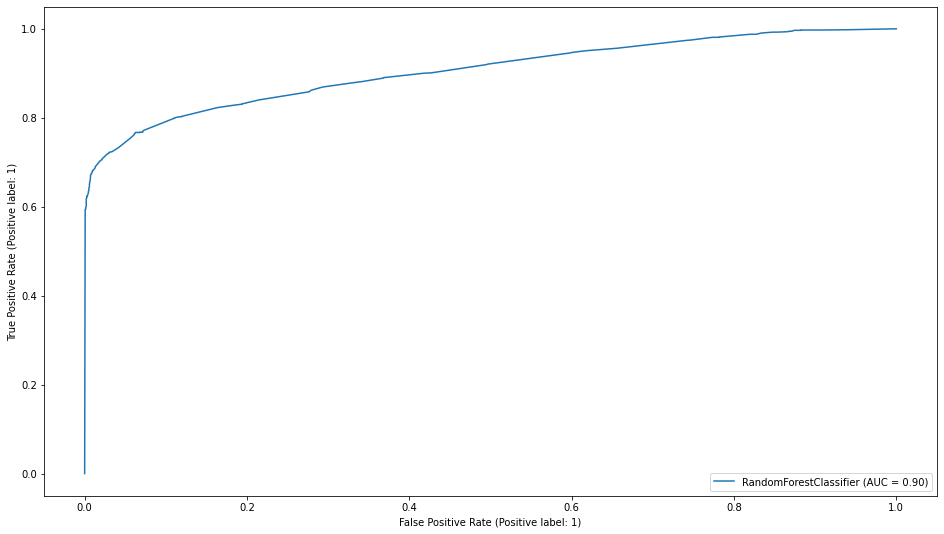

In [48]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_jobs=-1,random_state=123)
#learning
rfc.fit(X_train,Y_train)
#Prediction
rfcprediction=rfc.predict(X_test)

evaluate_model (rfc, X_test, y_test, rfcprediction)


**SVM Classifier**

Các chỉ số đánh giá mức độ hiệu quả của mô hình: 
1. Accuracy: 0.822
2. confusion_matrix:
[[1484  481]
 [  53  982]]
3. recall_score:  0.9487922705314009
4. precision_score:  0.6712235133287765
5. f1_score:  0.7862289831865492
6. Biểu đồ ROC của mô hình:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


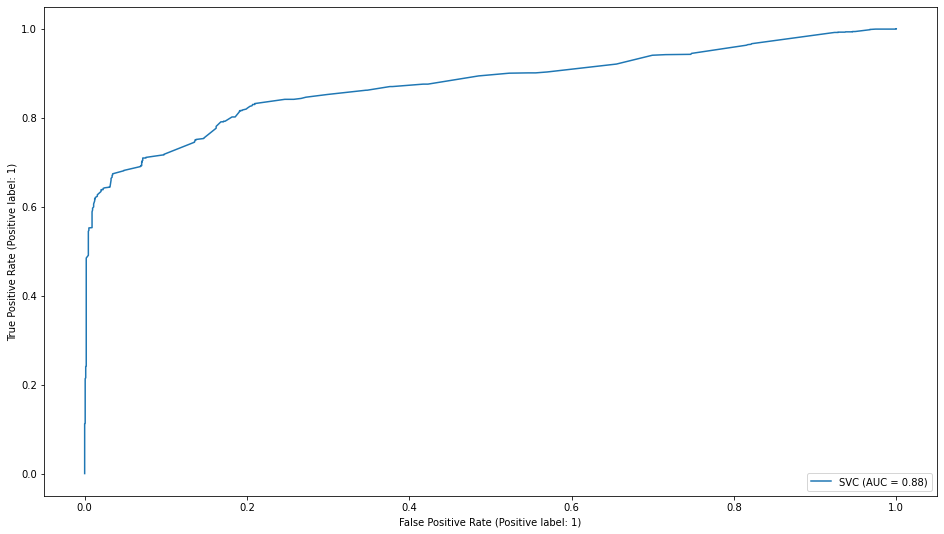

In [49]:
from sklearn import svm
#making the instance
svc = svm.SVC(random_state=123)
#learning
svc.fit(X_train,Y_train)
#Prediction
svcprediction=svc.predict(X_test)

evaluate_model (svc, X_test, y_test, svcprediction)

**K-NearestNeighbours Classifier**

Các chỉ số đánh giá mức độ hiệu quả của mô hình: 
1. Accuracy: 0.8136666666666666
2. confusion_matrix:
[[1354  376]
 [ 183 1087]]
3. recall_score:  0.8559055118110236
4. precision_score:  0.7429938482570062
5. f1_score:  0.7954628613245518
6. Biểu đồ ROC của mô hình:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


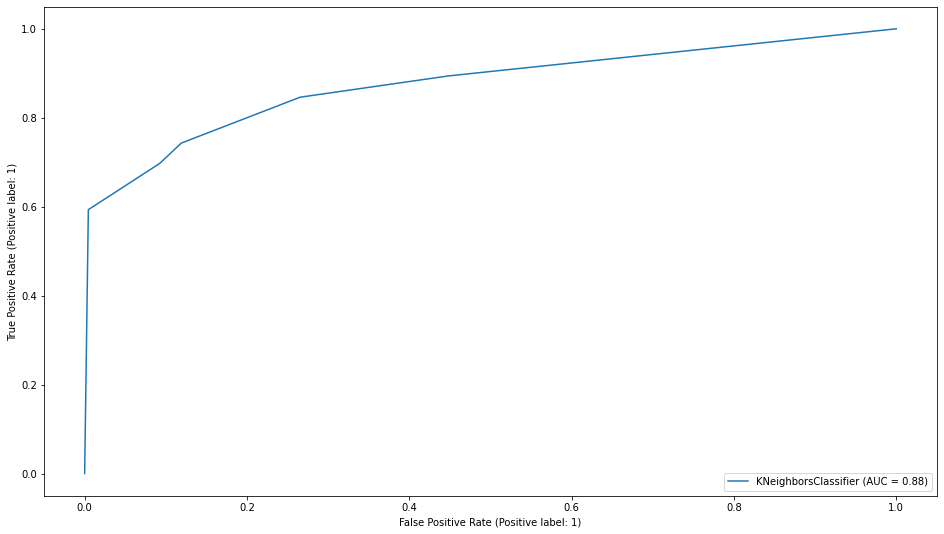

In [50]:
from sklearn.neighbors import KNeighborsClassifier
#making the instance
knn = KNeighborsClassifier()
#learning
knn.fit(X_train,Y_train)
#Prediction
knnprediction=knn.predict(X_test)

evaluate_model (knn, X_test, y_test, knnprediction)

**Ada Boost**

Các chỉ số đánh giá mức độ hiệu quả của mô hình: 
1. Accuracy: 0.804
2. confusion_matrix:
[[1363  414]
 [ 174 1049]]
3. recall_score:  0.8577269010629599
4. precision_score:  0.7170198222829802
5. f1_score:  0.7810871183916603
6. Biểu đồ ROC của mô hình:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


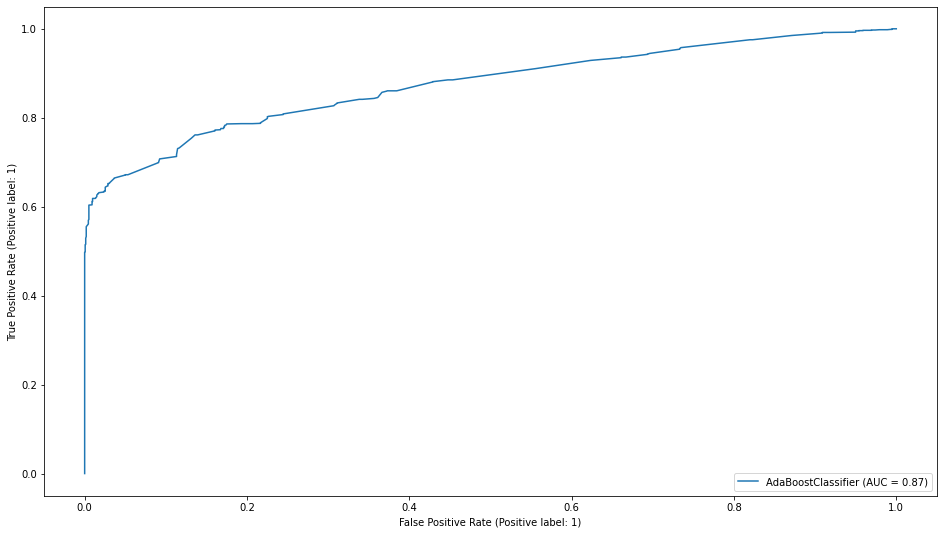

In [51]:
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier(n_estimators=200, random_state=44)

#learning
ada_model.fit(X_train,Y_train)
#Prediction
ada_modelprediction=ada_model.predict(X_test)

evaluate_model (ada_model, X_test, y_test, ada_modelprediction)

**XGB Classifier**

Các chỉ số đánh giá mức độ hiệu quả của mô hình: 
1. Accuracy: 0.809
2. confusion_matrix:
[[1432  468]
 [ 105  995]]
3. recall_score:  0.9045454545454545
4. precision_score:  0.6801093643198907
5. f1_score:  0.7764338665626219
6. Biểu đồ ROC của mô hình:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


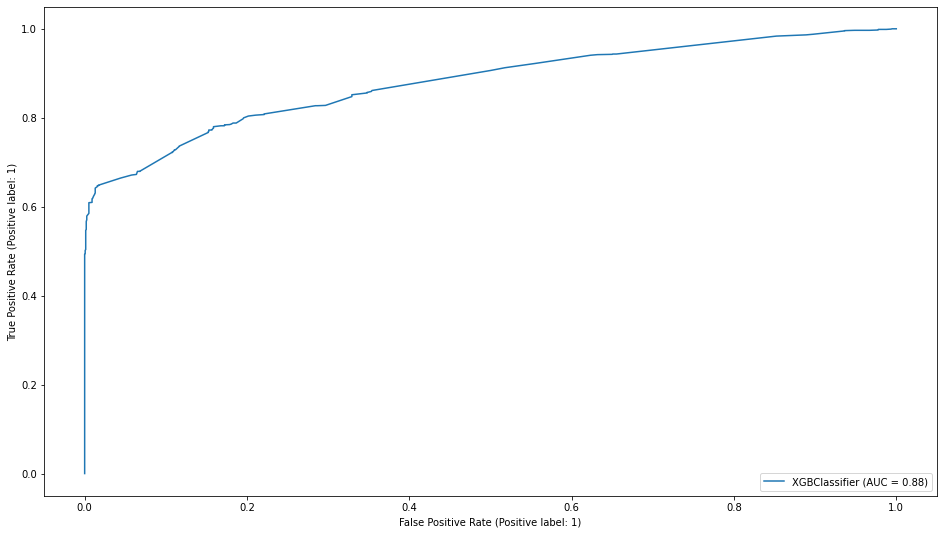

In [52]:
from xgboost import XGBClassifier

XGB_1 = XGBClassifier(objective='binary:logistic',scale_pos_weight=1,n_estimators=85, eta=0.3, subsample=1, colsample_bytree=1)

#learning
XGB_1.fit(X_train,Y_train)
#Prediction
XGB_modelprediction=XGB_1.predict(X_test)

evaluate_model (XGB_1, X_test, y_test, XGB_modelprediction)

**XGB Classifier Ver_2**

Các chỉ số đánh giá mức độ hiệu quả của mô hình: 
1. Accuracy: 0.8516666666666667
2. confusion_matrix:
[[1438  346]
 [  99 1117]]
3. recall_score:  0.9185855263157895
4. precision_score:  0.7634996582365003
5. f1_score:  0.833893243747667
6. Biểu đồ ROC của mô hình:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


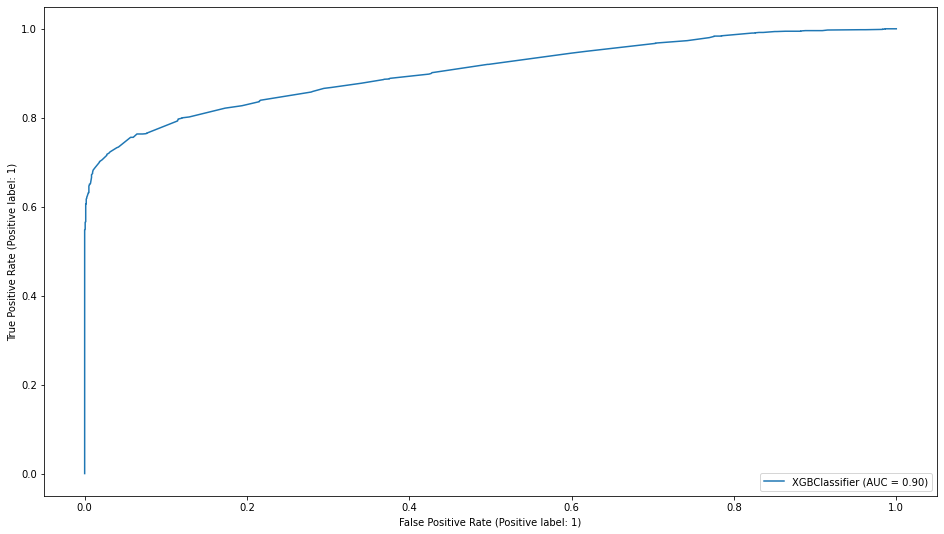

In [53]:
xgb_2 = XGBClassifier(learning_rate=0.4,max_depth=7)
#learning
xgb_2.fit(X_train,Y_train)
#Prediction
xgb_2_modelprediction_v2=xgb_2.predict(X_test)

evaluate_model (xgb_2, X_test, y_test, xgb_2_modelprediction_v2)

Các chỉ số đánh giá mức độ hiệu quả của mô hình: 
1. Accuracy: 0.8516666666666667
2. confusion_matrix:
[[1438  346]
 [  99 1117]]
3. recall_score:  0.9185855263157895
4. precision_score:  0.7634996582365003
5. f1_score:  0.833893243747667
6. Biểu đồ ROC của mô hình:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


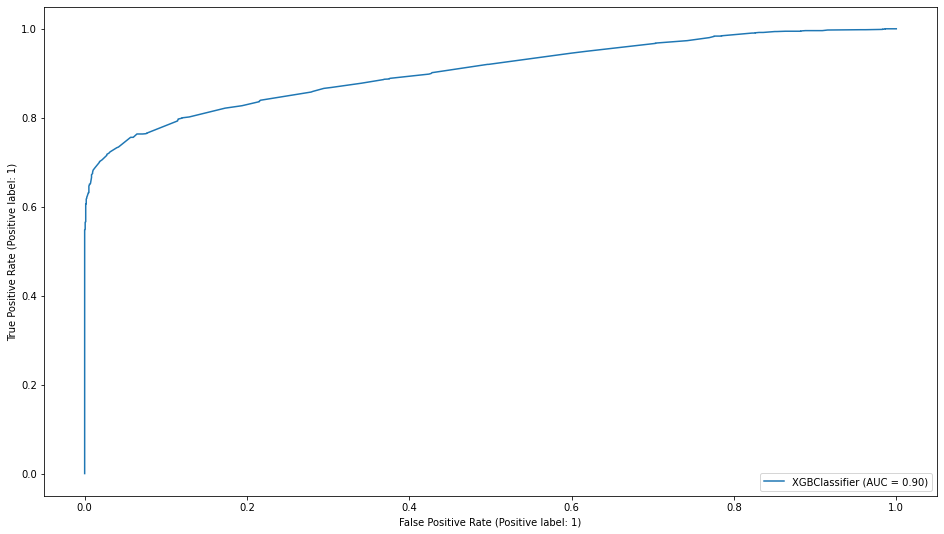

In [54]:
from xgboost import XGBClassifier

# instantiate the model
xgb_3 = XGBClassifier(learning_rate=0.4,max_depth=7)
#fit the model
xgb_3.fit(X_train, Y_train)

#predicting the target value from the model for the samples
y_test_xgb = xgb_3.predict(X_test)

evaluate_model (xgb_3, X_test, y_test, y_test_xgb)

**Light GBM**

Các chỉ số đánh giá mức độ hiệu quả của mô hình: 
1. Accuracy: 0.7943333333333333
2. confusion_matrix:
[[1535  615]
 [   2  848]]
3. recall_score:  0.9976470588235294
4. precision_score:  0.579630895420369
5. f1_score:  0.7332468655425852
6. Biểu đồ ROC của mô hình:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


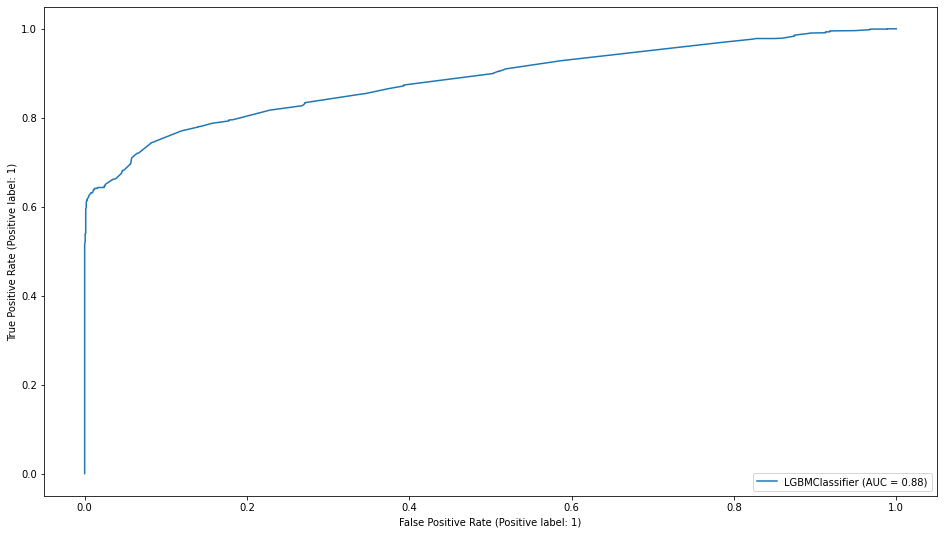

In [55]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, objective='binary',
                          class_weight={0:25, 1:1}, learning_rate=0.01,
                          boosting_type='dart')
lgbm_clf.fit(X_train, Y_train)

#Prediction
LGBM_modelprediction=lgbm_clf.predict(X_test)

evaluate_model (lgbm_clf, X_test, y_test, LGBM_modelprediction)

**Votting Classifier**

Các chỉ số đánh giá mức độ hiệu quả của mô hình: 
1. Accuracy: 0.831
2. confusion_matrix:
[[1527  497]
 [  10  966]]
3. recall_score:  0.9897540983606558
4. precision_score:  0.6602870813397129
5. f1_score:  0.7921279212792128
6. Biểu đồ ROC của mô hình:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


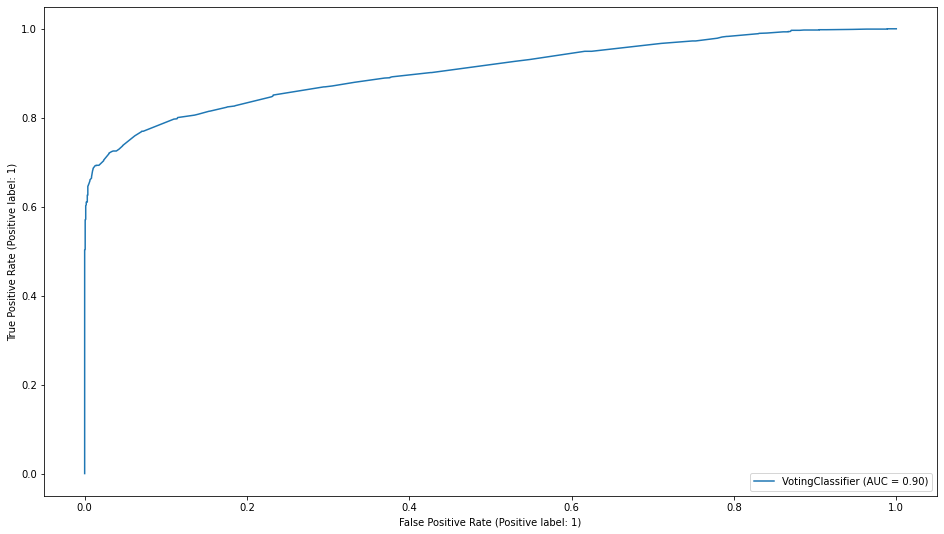

In [58]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, \
    ExtraTreesClassifier, VotingClassifier

clf1 = RandomForestClassifier(n_estimators=200, class_weight={0: 100, 1: 1})
clf2 = GradientBoostingClassifier(n_estimators=1000, max_depth=7)
clf3 = ExtraTreesClassifier(n_estimators=1000, class_weight={0: 100, 1: 1})
clf4 = XGBClassifier(n_estimators=1000, max_depth=5, learning_rate=0.01)
pos_clf = VotingClassifier(estimators=[('pos', clf1), ('gb', clf2),
                                        ('et', clf3), ('xgb', clf4)],
                            voting='soft',
                            weights=[1, 2, 1, 1])

pos_clf.fit(X_train, Y_train)

#Prediction
Vot_modelprediction=pos_clf.predict(X_test)

evaluate_model (pos_clf, X_test, y_test, Vot_modelprediction)

**Gradient Boosting Classifier**

Các chỉ số đánh giá mức độ hiệu quả của mô hình: 
1. Accuracy: 0.855
2. confusion_matrix:
[[1443  341]
 [  94 1122]]
3. recall_score:  0.9226973684210527
4. precision_score:  0.7669172932330827
5. f1_score:  0.8376259798432251
6. Biểu đồ ROC của mô hình:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


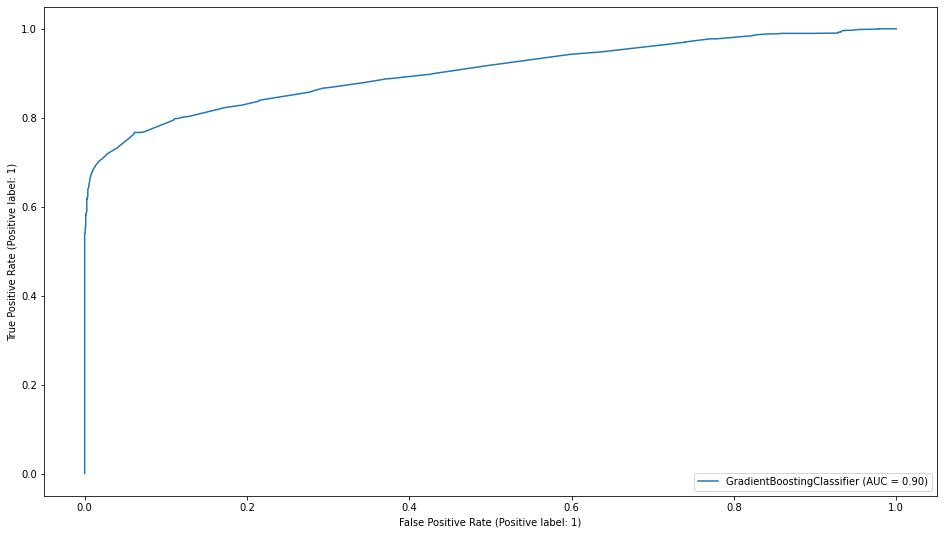

In [59]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, \
    ExtraTreesClassifier, VotingClassifier

GBoost = GradientBoostingClassifier(n_estimators=1000, max_depth=7)


GBoost.fit(X_train, Y_train)

#Prediction
GBoost_modelprediction=GBoost.predict(X_test)

evaluate_model (GBoost, X_test, y_test, GBoost_modelprediction)

**Extra Trees Classifier**

Các chỉ số đánh giá mức độ hiệu quả của mô hình: 
1. Accuracy: 0.8176666666666667
2. confusion_matrix:
[[1531  541]
 [   6  922]]
3. recall_score:  0.9935344827586207
4. precision_score:  0.6302118933697881
5. f1_score:  0.7712254286909244
6. Biểu đồ ROC của mô hình:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


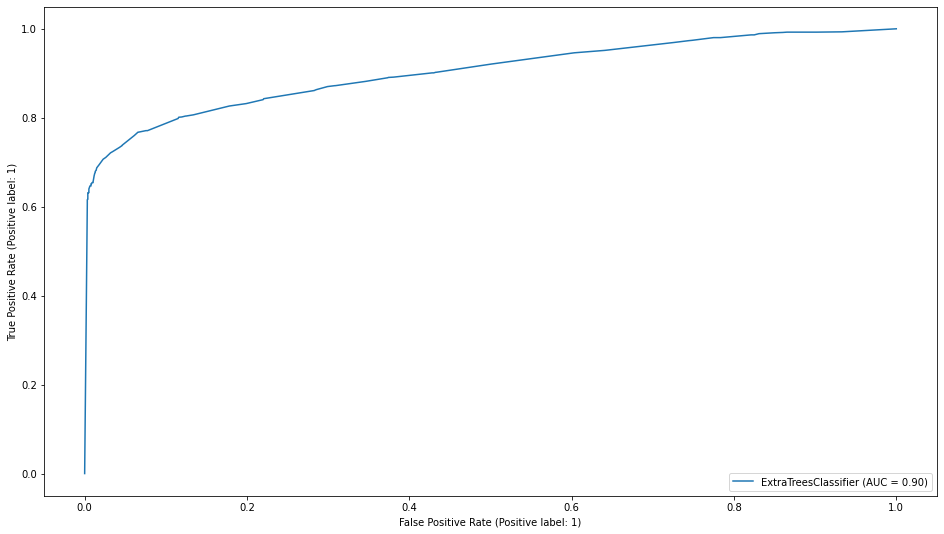

In [60]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, \
    ExtraTreesClassifier, VotingClassifier

Extra = ExtraTreesClassifier(n_estimators=1000, class_weight={0: 100, 1: 1})


Extra.fit(X_train, Y_train)

#Prediction
Extra_modelprediction=Extra.predict(X_test)

evaluate_model (Extra, X_test, y_test, Extra_modelprediction)

**Cat Boosting**

In [61]:
pip install catboost

     |████████████████████████████████| 76.6 MB 1.2 MB/s 


0:	learn: 0.5355043	total: 49.6ms	remaining: 49.5s
1:	learn: 0.4659694	total: 54.6ms	remaining: 27.2s
2:	learn: 0.4349565	total: 59.2ms	remaining: 19.7s
3:	learn: 0.4124392	total: 63.6ms	remaining: 15.8s
4:	learn: 0.4000244	total: 68.2ms	remaining: 13.6s
5:	learn: 0.3925652	total: 72.9ms	remaining: 12.1s
6:	learn: 0.3896253	total: 75.2ms	remaining: 10.7s
7:	learn: 0.3808368	total: 79.9ms	remaining: 9.9s
8:	learn: 0.3750944	total: 84.6ms	remaining: 9.32s
9:	learn: 0.3707187	total: 89.7ms	remaining: 8.88s
10:	learn: 0.3642473	total: 94.2ms	remaining: 8.47s
11:	learn: 0.3604651	total: 99.3ms	remaining: 8.18s
12:	learn: 0.3572135	total: 104ms	remaining: 7.9s
13:	learn: 0.3568144	total: 106ms	remaining: 7.46s
14:	learn: 0.3534909	total: 111ms	remaining: 7.27s
15:	learn: 0.3515478	total: 115ms	remaining: 7.09s
16:	learn: 0.3506745	total: 120ms	remaining: 6.93s
17:	learn: 0.3489030	total: 125ms	remaining: 6.8s
18:	learn: 0.3471711	total: 129ms	remaining: 6.67s
19:	learn: 0.3462394	total: 134m

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


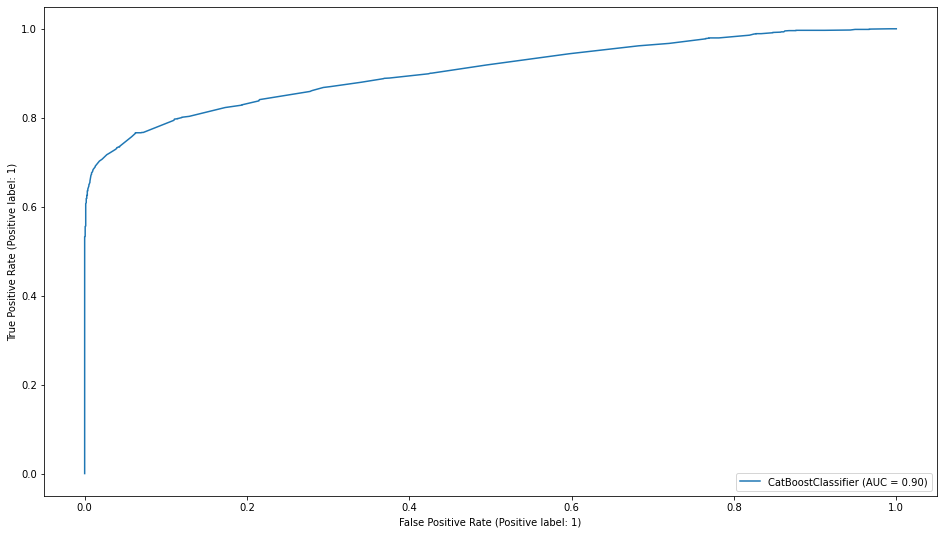

In [62]:
from catboost import CatBoostClassifier

model_catboss = CatBoostClassifier(learning_rate = 0.2, depth = 8, rsm = 1)

model_catboss.fit(X_train, Y_train)

#Prediction
cast_modelprediction=model_catboss.predict(X_test)

evaluate_model (model_catboss, X_test, y_test, cast_modelprediction)

# **Deep Learning**

# **ANN**

In [63]:
# Import the necessary libraries for ANN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [64]:
# Create a Sequential Neural Network model 
model = Sequential()
# Create an Input and a Hidden Layer
model.add(Dense(units=50,activation="relu",kernel_initializer="he_uniform"))
# Create an Output Layer
model.add(Dense(units=1,activation="sigmoid"))
# Now, my model is ready to compile
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [66]:
model.fit(X_train,y_train,batch_size=64,epochs=100)

Epoch 1/100
110/110 [==============================] - 2s 3ms/step - loss: 0.6482 - accuracy: 0.6627
Epoch 2/100
110/110 [==============================] - 0s 3ms/step - loss: 0.5365 - accuracy: 0.7741
Epoch 3/100
110/110 [==============================] - 0s 3ms/step - loss: 0.4642 - accuracy: 0.7901
Epoch 4/100
110/110 [==============================] - 0s 3ms/step - loss: 0.4336 - accuracy: 0.7931
Epoch 5/100
110/110 [==============================] - 0s 3ms/step - loss: 0.4201 - accuracy: 0.7967
Epoch 6/100
110/110 [==============================] - 0s 3ms/step - loss: 0.4136 - accuracy: 0.7987
Epoch 7/100
110/110 [==============================] - 0s 3ms/step - loss: 0.4084 - accuracy: 0.7990
Epoch 8/100
110/110 [==============================] - 0s 2ms/step - loss: 0.4056 - accuracy: 0.7976
Epoch 9/100
110/110 [==============================] - 0s 2ms/step - loss: 0.4030 - accuracy: 0.7981
Epoch 10/100
110/110 [==============================] - 0s 2ms/step - loss: 0.4013 - accura

In [67]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                800       
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 851
Trainable params: 851
Non-trainable params: 0
_________________________________________________________________


In [68]:
# Predict the X_test results
y_pred = model.predict(X_test)

In [74]:
y_pred_label = []
for i in range(0, len(y_pred)):
  if y_pred[i] >= 0.5:
    y_pred_label.append(1)
  else:
    y_pred_label.append(0)

In [75]:
print("Các chỉ số đánh giá mức độ hiệu quả của mô hình: ")
#Accuracy
print("1. Accuracy:",metrics.accuracy_score(y_pred_label,y_test))
# confusion_matrix
print('2. confusion_matrix:')
print(confusion_matrix(y_pred_label,y_test))
# recall_score
print('3. recall_score: ', recall_score(y_pred_label,y_test))
# precision_score
print('4. precision_score: ', precision_score(y_pred_label,y_test))
# f1_score
print('5. f1_score: ', f1_score(y_pred_label,y_test))

Các chỉ số đánh giá mức độ hiệu quả của mô hình: 
1. Accuracy: 0.8436666666666667
2. confusion_matrix:
[[1466  398]
 [  71 1065]]
3. recall_score:  0.9375
4. precision_score:  0.7279562542720438
5. f1_score:  0.819545979222778


# **LSTM**

In [76]:
# Import the necessary libraries for ANN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import RepeatVector
from keras.layers import Dropout

In [77]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [78]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
219/219 [==============================] - 27s 50ms/step - loss: 0.2498
Epoch 2/100
219/219 [==============================] - 11s 49ms/step - loss: 0.1937
Epoch 3/100
219/219 [==============================] - 13s 59ms/step - loss: 0.1718
Epoch 4/100
219/219 [==============================] - 8s 36ms/step - loss: 0.1666
Epoch 5/100
219/219 [==============================] - 8s 35ms/step - loss: 0.1634
Epoch 6/100
219/219 [==============================] - 8s 35ms/step - loss: 0.1624
Epoch 7/100
219/219 [==============================] - 8s 34ms/step - loss: 0.1593
Epoch 8/100
219/219 [==============================] - 8s 35ms/step - loss: 0.1579
Epoch 9/100
219/219 [==============================] - 8s 35ms/step - loss: 0.1553
Epoch 10/100
219/219 [==============================] - 8s 34ms/step - loss: 0.1537
Epoch 11/100
219/219 [==============================] - 9s 42ms/step - loss: 0.1534
Epoch 12/100
219/219 [==============================] - 8s 35ms/step - loss: 0.151

In [79]:
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 15, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 15, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 15, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 15, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 15, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)               

In [80]:
# Predict the X_test results
y_pred = regressor.predict(X_test)

In [81]:
y_pred_label = []
for i in range(0, len(y_pred)):
  if y_pred[i] >= 0.5:
    y_pred_label.append(1)
  else:
    y_pred_label.append(0)

In [82]:
print("Các chỉ số đánh giá mức độ hiệu quả của mô hình: ")
#Accuracy
print("1. Accuracy:",metrics.accuracy_score(y_pred_label,y_test))
# confusion_matrix
print('2. confusion_matrix:')
print(confusion_matrix(y_pred_label,y_test))
# recall_score
print('3. recall_score: ', recall_score(y_pred_label,y_test))
# precision_score
print('4. precision_score: ', precision_score(y_pred_label,y_test))
# f1_score
print('5. f1_score: ', f1_score(y_pred_label,y_test))

Các chỉ số đánh giá mức độ hiệu quả của mô hình: 
1. Accuracy: 0.8393333333333334
2. confusion_matrix:
[[1405  350]
 [ 132 1113]]
3. recall_score:  0.8939759036144578
4. precision_score:  0.7607655502392344
5. f1_score:  0.8220088626292467


# ***Kết thúc!***